<a href="https://colab.research.google.com/github/kelaxax/ML/blob/main/%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn matplotlib

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Coffe_sales.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [ ]:
df['cash_type'] = df['cash_type'].astype('category')
df['coffee_name'] = df['coffee_name'].astype('category')
df['Time_of_Day'] = df['Time_of_Day'].astype('category')
df['Weekday'] = df['Weekday'].astype('category')
df['Month_name'] = df['Month_name'].astype('category')

In [ ]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df.money
X = df.drop('money', axis=1)

In [ ]:
X.head(n=3)

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000


In [ ]:
y.head(n=3)

,money
0,38.7
1,38.7
2,38.7


In [ ]:
y_eda = df["money"]

# признаки (убираем money)
X_eda = df.drop(columns=["money"])

In [ ]:
X_eda.describe(include='all')

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
count,3547.000000,3547,3547,3547,3547,3547,3547.000000,3547.000000,3547,3547
unique,NaN,1,8,3,7,12,NaN,NaN,381,3547
top,NaN,card,Americano with Milk,Afternoon,Tue,Mar,NaN,NaN,2024-10-11,18:11:38.635000
freq,NaN,3547,809,1205,572,494,NaN,NaN,26,1
mean,14.185791,NaN,NaN,NaN,NaN,NaN,3.845785,6.453905,NaN,NaN
std,4.234010,NaN,NaN,NaN,NaN,NaN,1.971501,3.500754,NaN,NaN
min,6.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,10.000000,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN
50%,14.000000,NaN,NaN,NaN,NaN,NaN,4.000000,7.000000,NaN,NaN
75%,18.000000,NaN,NaN,NaN,NaN,NaN,6.000000,10.000000,NaN,NaN


cash_type
card    3547
Name: count, dtype: int64


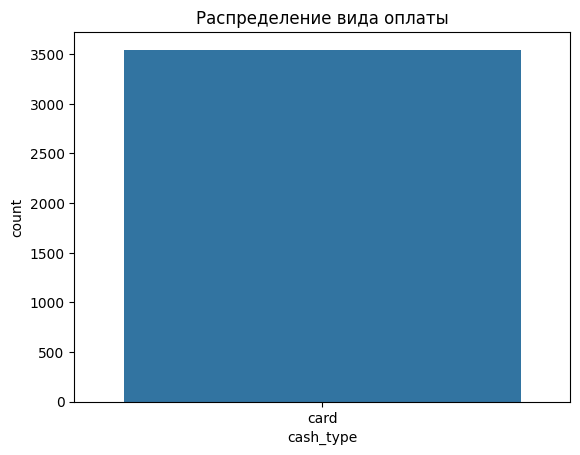

            count       mean       std    min    25%    50%    75%   max
cash_type                                                               
card       3547.0  31.645216  4.877754  18.12  27.92  32.82  35.76  38.7


/tmp/ipython-input-46136380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("cash_type")["money"].describe())


In [ ]:
print(df["cash_type"].value_counts())
sns.countplot(data=df, x="cash_type")
plt.title("Распределение вида оплаты")
plt.show()

print(df.groupby("cash_type")["money"].describe())

Единсвенный способ оплаты картой

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64


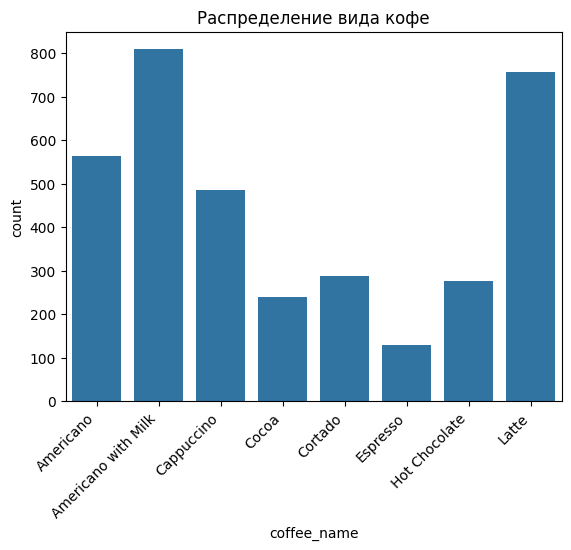

                     count       mean       std    min    25%    50%    75%  \
coffee_name                                                                   
Americano            564.0  25.975638  1.676099  23.02  25.96  25.96  25.96   
Americano with Milk  809.0  30.594710  1.883843  27.92  27.92  30.86  30.86   
Cappuccino           486.0  35.883004  1.819232  32.82  35.76  35.76  37.72   
Cocoa                239.0  35.653389  1.233693  32.82  35.76  35.76  35.76   
Cortado              287.0  25.731220  2.093669  23.02  23.02  25.96  27.92   
Espresso             129.0  20.854884  1.974016  18.12  18.12  21.06  23.02   
Hot Chocolate        276.0  35.990797  1.437499  32.82  35.76  35.76  35.76   
Latte                757.0  35.502378  1.821834  32.82  32.82  35.76  35.76   

                      max  
coffee_name                
Americano            28.9  
Americano with Milk  33.8  
Cappuccino           38.7  
Cocoa                38.7  
Cortado              28.9  
Espresso     

/tmp/ipython-input-325080364.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("coffee_name")["money"].describe())


In [ ]:
print(df["coffee_name"].value_counts())
sns.countplot(data=df, x="coffee_name")
plt.title("Распределение вида кофе")
plt.xticks(rotation=45, ha='right')
plt.show()

print(df.groupby("coffee_name")["money"].describe())

Больше всего покупают Americano with Milk 809; Latte 757; Americano 564; Cappuccino 486

Средняя цена колеблется от 20, 25 до 30, 35

Time_of_Day
Afternoon    1205
Morning      1181
Night        1161
Name: count, dtype: int64


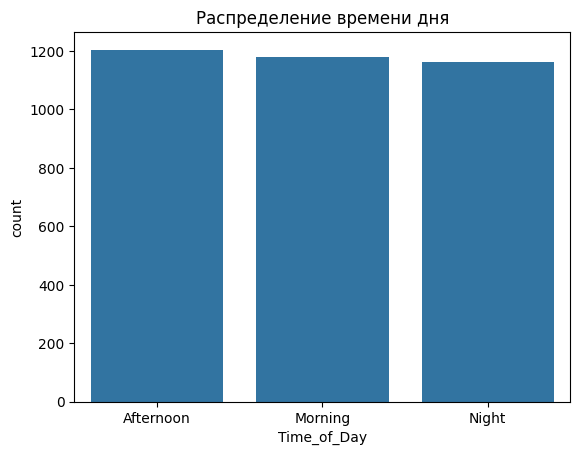

              count       mean       std    min    25%    50%    75%   max
Time_of_Day                                                               
Afternoon    1205.0  31.643187  4.922851  18.12  27.92  32.82  35.76  38.7
Morning      1181.0  30.422693  4.944466  18.12  25.96  30.86  35.76  38.7
Night        1161.0  32.890904  4.430970  18.12  30.86  33.80  35.76  38.7


/tmp/ipython-input-1753451745.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Time_of_Day")["money"].describe())


In [ ]:
print(df["Time_of_Day"].value_counts())
sns.countplot(data=df, x="Time_of_Day")
plt.title("Распределение времени дня")
plt.show()

print(df.groupby("Time_of_Day")["money"].describe())

Равномерно покупают в любое время дня

Weekday
Tue    572
Mon    544
Fri    532
Thu    510
Wed    500
Sat    470
Sun    419
Name: count, dtype: int64


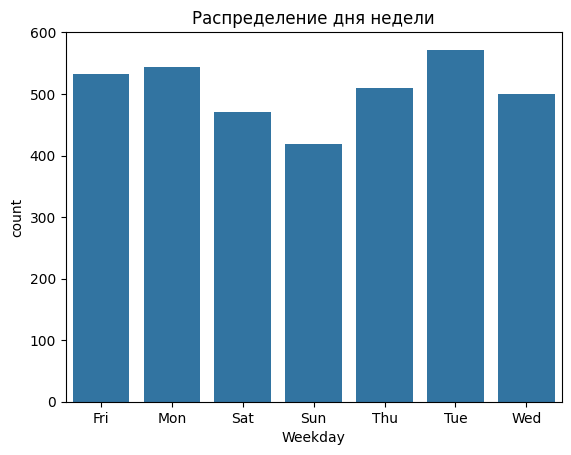

         count       mean       std    min    25%    50%    75%   max
Weekday                                                              
Fri      532.0  31.583947  4.913948  18.12  27.92  32.82  35.76  38.7
Mon      544.0  31.917463  4.511083  18.12  27.92  32.82  35.76  38.7
Sat      470.0  31.347915  5.003080  18.12  25.96  32.82  35.76  38.7
Sun      419.0  31.828305  4.878133  18.12  27.92  32.82  35.76  38.7
Thu      510.0  31.551765  5.187470  18.12  27.92  32.82  35.76  38.7
Tue      572.0  31.762902  4.738134  18.12  27.92  32.82  35.76  38.7
Wed      500.0  31.500920  4.939150  18.12  27.92  32.82  35.76  38.7


/tmp/ipython-input-260005028.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Weekday")["money"].describe())


In [ ]:
print(df["Weekday"].value_counts())
sns.countplot(data=df, x="Weekday")
plt.title("Распределение дня недели")
plt.show()

print(df.groupby("Weekday")["money"].describe())

чаще покупают в вторник, понедельник пятницу. Во все дни недели средняя цена примерно одинаковая

Month_name
Mar    494
Oct    426
Feb    423
Sep    344
Aug    272
Dec    259
Nov    259
May    241
Jul    237
Jun    223
Jan    201
Apr    168
Name: count, dtype: int64


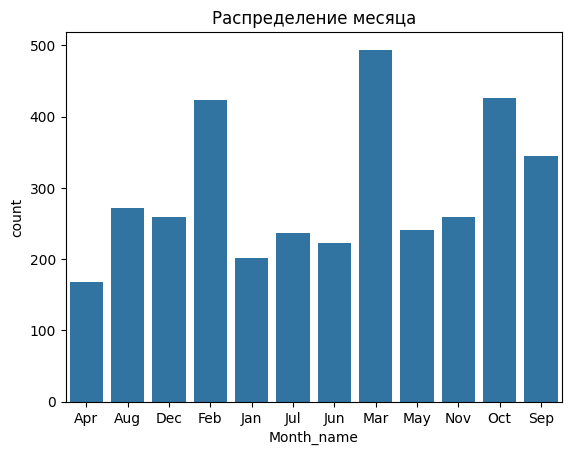

            count       mean       std    min    25%    50%    75%    max
Month_name                                                               
Apr         168.0  34.045000  4.491244  24.00  28.90  33.80  38.70  38.70
Aug         272.0  27.992059  4.629844  18.12  23.02  27.92  32.82  32.82
Dec         259.0  31.805946  4.609824  21.06  25.96  35.76  35.76  35.76
Feb         423.0  31.242270  4.688919  21.06  25.96  30.86  35.76  35.76
Jan         201.0  31.835124  4.328115  21.06  25.96  30.86  35.76  35.76
Jul         237.0  29.181181  4.766329  18.12  27.92  27.92  32.82  37.72
Jun         223.0  34.160359  4.291851  23.02  32.82  37.72  37.72  37.72
Mar         494.0  32.169312  4.906599  21.06  28.90  33.80  35.76  38.70
May         241.0  33.877261  4.436914  23.02  27.92  37.72  37.72  37.72
Nov         259.0  33.168108  3.841013  21.06  30.86  35.76  35.76  35.76
Oct         426.0  32.608357  4.289967  21.06  30.86  35.76  35.76  35.76
Sep         344.0  29.036744  4.455339

/tmp/ipython-input-1083546815.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Month_name")["money"].describe())


In [ ]:
print(df["Month_name"].value_counts())
sns.countplot(data=df, x="Month_name")
plt.title("Распределение месяца")
plt.show()

print(df.groupby("Month_name")["money"].describe())

Больше всего покупают в марте, октябре, феврале, сентябре. Средняя цена больше в месяцах в которых меньше покупок.

**Вывод**

В основном покупают Americano with Milk, Latte, Americano, Cappuccino в начале и в конце рабочей недели, в начале холодных дней.

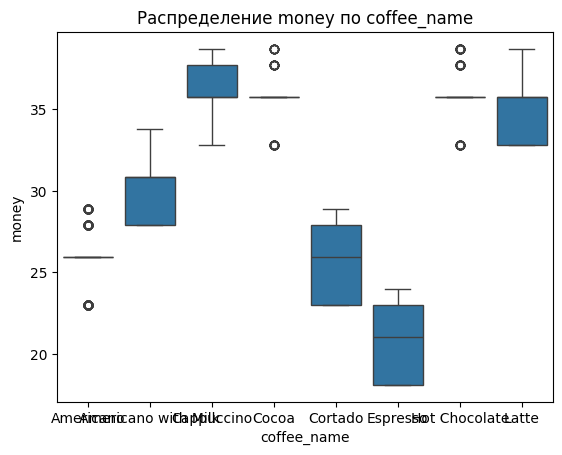

In [ ]:
sns.boxplot(data=df, x="coffee_name", y="money")
plt.title("Распределение money по coffee_name")
plt.show()

Значения сильно разбросаны

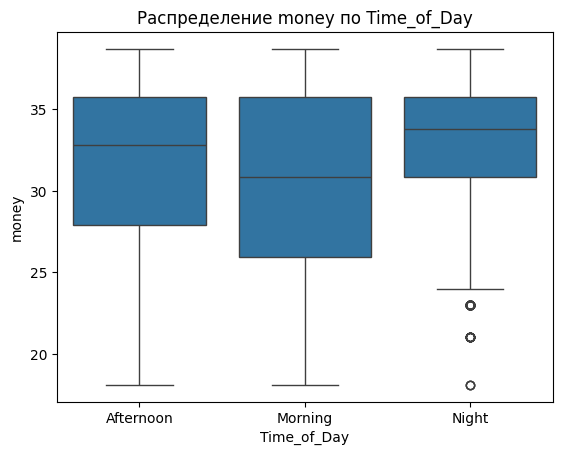

In [ ]:
sns.boxplot(data=df, x="Time_of_Day", y="money")
plt.title("Распределение money по Time_of_Day")
plt.show()

Ночью медианна чуть выше. Утром чуть ниже

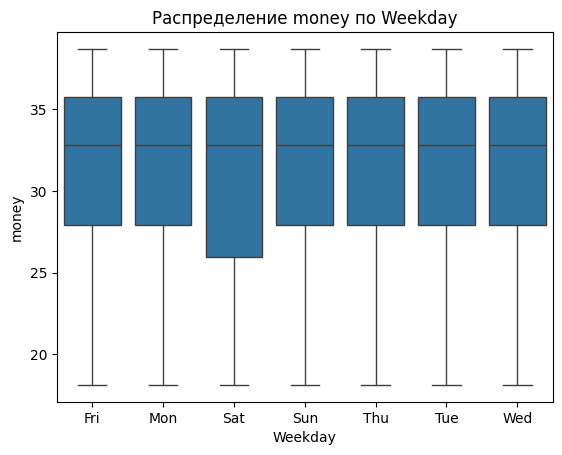

In [ ]:
sns.boxplot(data=df, x="Weekday", y="money")
plt.title("Распределение money по Weekday")
plt.show()

Медианна везде одна

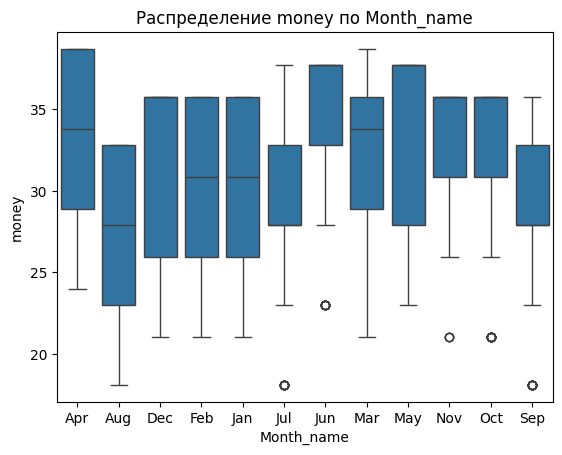

In [ ]:
sns.boxplot(data=df, x="Month_name", y="money")
plt.title("Распределение money по Month_name")
plt.show()

В определенные месяцы медиана то растет то падает, связано с временем года

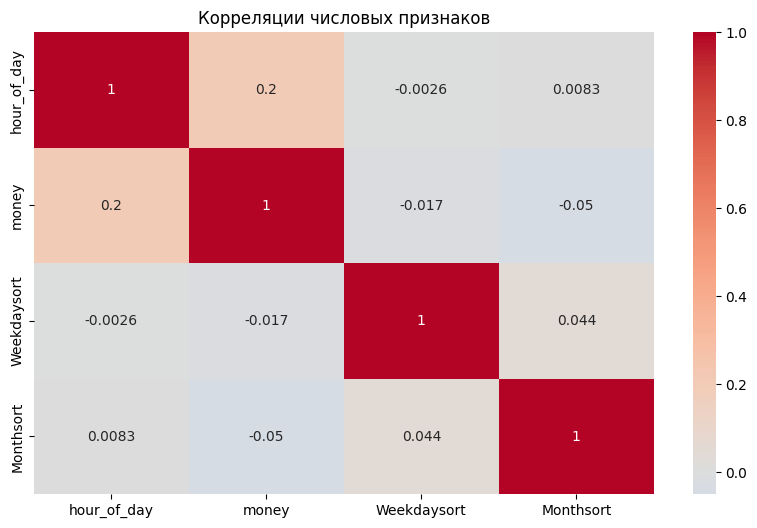

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Корреляции числовых признаков")
plt.show()

hour_of_day - 0.2 слабая положительная почти нет влияния

остальные признаки не влияют

/tmp/ipython-input-1000053926.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")


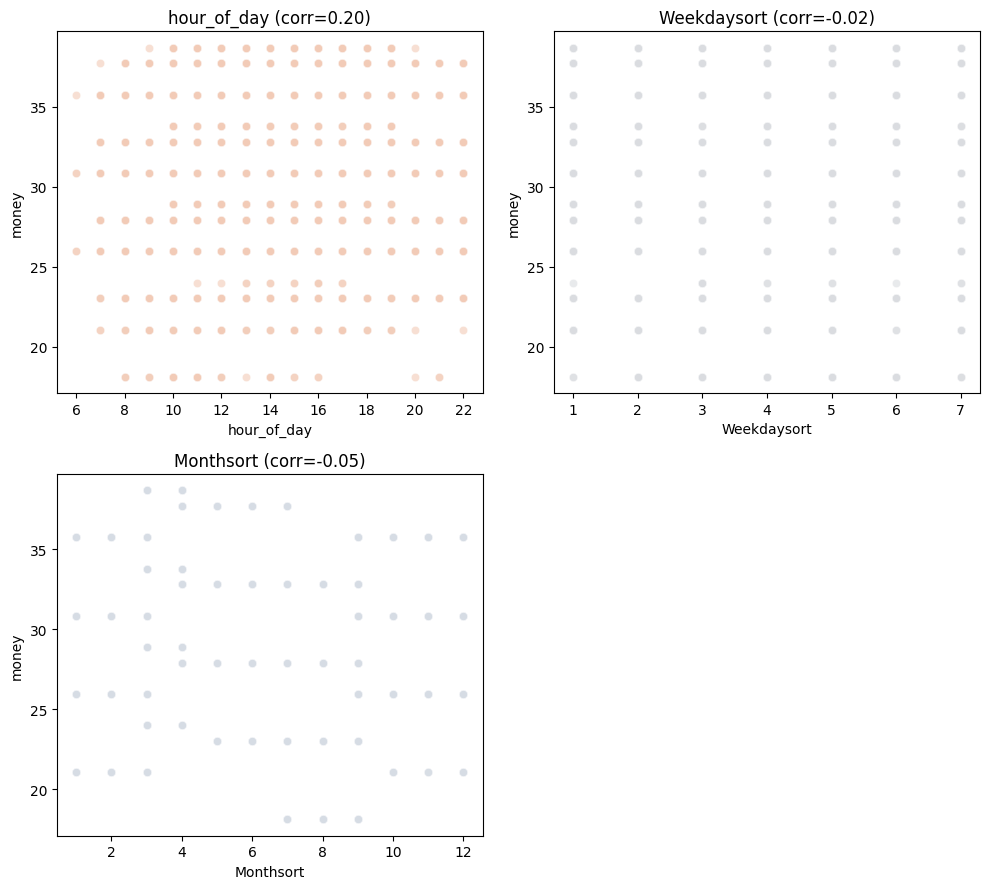

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_features = X_eda.select_dtypes(include="number").columns
n = len(num_features)

# корреляции с alcohol
corrs = df[num_features].corrwith(df["money"])

# палитра (от синего до красного)
cmap = plt.cm.get_cmap("coolwarm")

# сетка графиков (2 в строку)
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(10, n*3))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)   # переводим [-1,1] → [0,1]

    sns.scatterplot(ax=axes[i], data=df, x=col, y="money", color=color, alpha=0.6)
    axes[i].set_title(f"{col} (corr={corr:.2f})")

# удаляем пустые ячейки
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
categorial_features = ['coffee_name']
numerical_features = []

best_features = categorial_features + numerical_features # соединение массивов

X = df[best_features] # обращение к нескольким колонкам
y = df.money

In [ ]:
X.head(n=2)

,coffee_name
0,Latte
1,Hot Chocolate


In [ ]:
y.head()

,money
0,38.7
1,38.7
2,38.7
3,28.9
4,38.7


In [ ]:
from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["coffee_name"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат


In [ ]:
encoder.categories_

[array(['Americano', 'Americano with Milk', 'Cappuccino', 'Cocoa',
        'Cortado', 'Espresso', 'Hot Chocolate', 'Latte'], dtype=object)]

In [ ]:
encoder.get_feature_names_out()

array(['coffee_name_Americano', 'coffee_name_Americano with Milk',
       'coffee_name_Cappuccino', 'coffee_name_Cocoa',
       'coffee_name_Cortado', 'coffee_name_Espresso',
       'coffee_name_Hot Chocolate', 'coffee_name_Latte'], dtype=object)

In [ ]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3543,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = X.drop('coffee_name', axis=1) if 'coffee_name' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'coffee_name_Americano' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

In [ ]:
X

,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3543,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(
    fit_intercept=True, # считать свобоный коэфициент B
    copy_X=True, # Глубокое коирование матрицы X, чтробы не модифицировать
    n_jobs=None, # None - 1 ядро используем
    positive=False, # все weight могут быть как положительными, так и отрицательными
)

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
y_pred = model.predict(X) # предсказываем результат
y_pred

array([35.50237781, 35.9907971 , 35.9907971 , ..., 35.65338912,
       25.9756383 , 35.50237781])

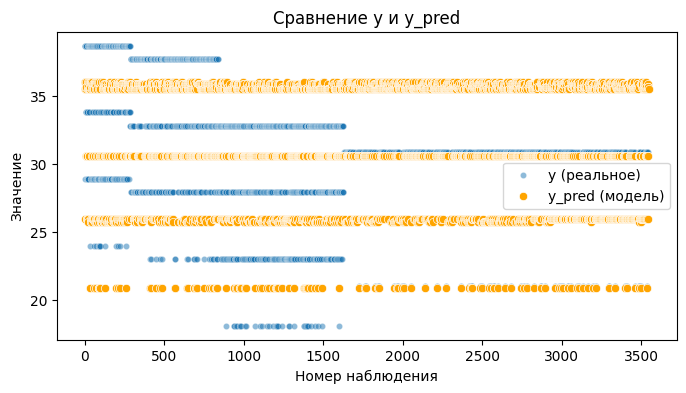

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

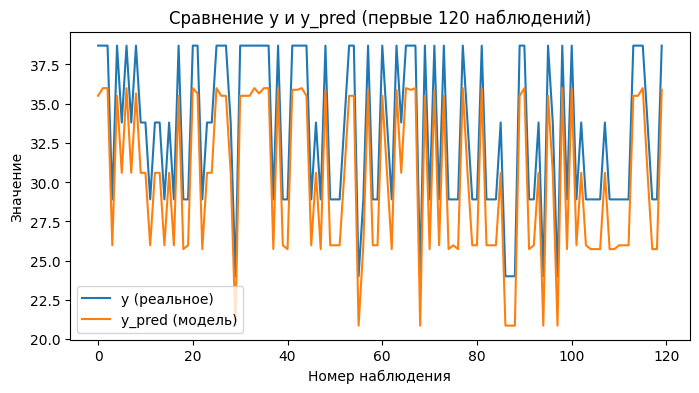

In [ ]:
n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).head(n=3)

,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,-0.434823,-0.543573,-0.398462,-0.268792,-0.29671,-0.194271,-0.290479,1.919792
1,-0.434823,-0.543573,-0.398462,-0.268792,-0.29671,-0.194271,3.442593,-0.520890
2,-0.434823,-0.543573,-0.398462,-0.268792,-0.29671,-0.194271,3.442593,-0.520890


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

In [ ]:
model1 = LinearRegression()
model1.fit(X, y)
y_pred1 = model1.predict(X)

In [ ]:
calculate_metrics(y, y_pred1)
#MAE насколько ошибаемся(ближе к 0)
#MAPE ошибка в процентах(ближе к 0)
#R² Показывает, насколько хорошо модель объясняет разброс данных(ближе к 1)
#MSE среднюя величина ошибки в квадрате(ближе к 0)
#RMSE Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют(ближе к 0)

MAE 1.283
MAPE=0.042, MAPE_as_percent=4.249%
R2=0.867
MSE=3.171
RMSE=1.781


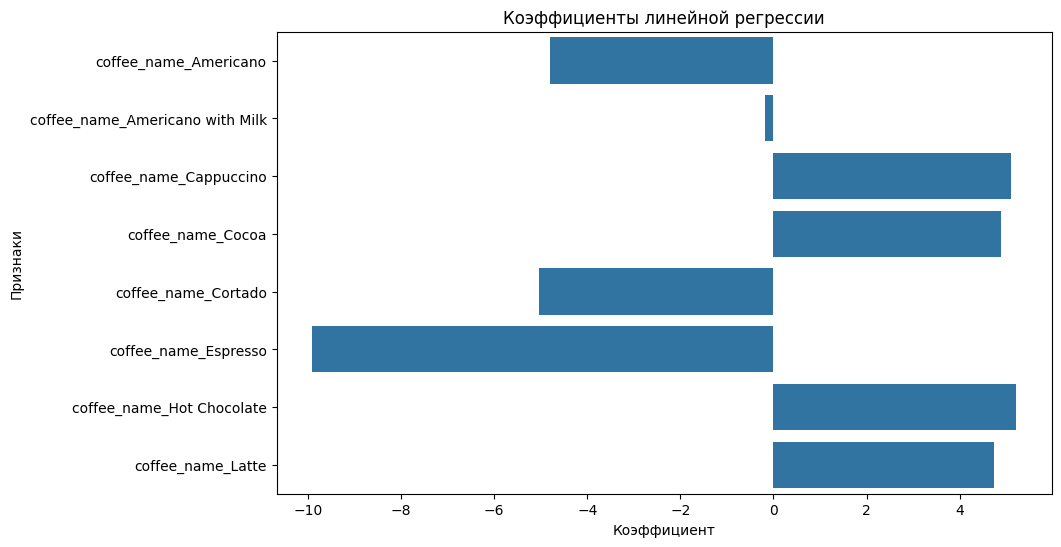

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=model.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()
#Положительный → рост признака увеличивает целевую переменную.
#Отрицательный → рост признака уменьшает целевую переменную.
#Абсолютное значение коэффициента показывает, насколько сильно признак влияет.
#Больший по модулю коэффициент = более важный признак (если все признаки приведены к одной шкале).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест

In [ ]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

In [ ]:
print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred2)
#MAE насколько ошибаемся(ближе к 0)
#MAPE ошибка в процентах(ближе к 0)
#R² Показывает, насколько хорошо модель объясняет разброс данных(ближе к 1)
#MSE среднюя величина ошибки в квадрате(ближе к 0)
#RMSE Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют(ближе к 0)

метрики для выборки на которых обучалась модель
MAE 1.275
MAPE=0.042, MAPE_as_percent=4.227%
R2=0.870
MSE=3.121
RMSE=1.767


In [ ]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred2)
#MAE насколько ошибаемся(ближе к 0)
#MAPE ошибка в процентах(ближе к 0)
#R² Показывает, насколько хорошо модель объясняет разброс данных(ближе к 1)
#MSE среднюя величина ошибки в квадрате(ближе к 0)
#RMSE Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют(ближе к 0)

метрики для выборки на которых модель никогда не обучалась
MAE 1.355
MAPE=0.045, MAPE_as_percent=4.452%
R2=0.852
MSE=3.375
RMSE=1.837


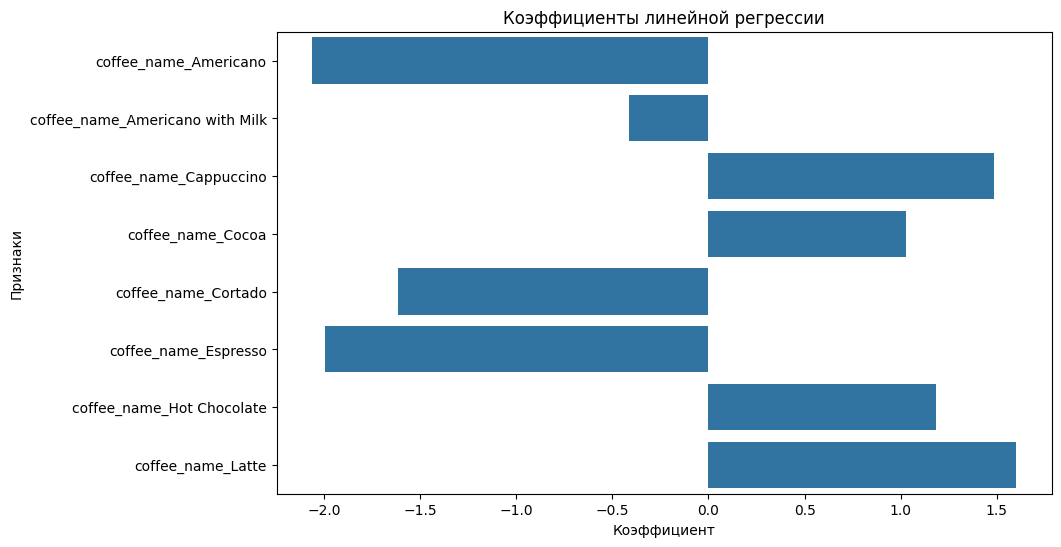

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=model2.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

In [ ]:
coefficients1_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model1.coef_
}).sort_values('coefficient', key=abs, ascending=False)

best_features = coefficients1_df.head(3)['feature'].tolist()
model3 = LinearRegression()
model3.fit(X[best_features], y)
y_pred3 = model3.predict(X[best_features])

In [ ]:
calculate_metrics(y, y_pred3)
#MAE насколько ошибаемся(ближе к 0)
#MAPE ошибка в процентах(ближе к 0)
#R² Показывает, насколько хорошо модель объясняет разброс данных(ближе к 1)
#MSE среднюя величина ошибки в квадрате(ближе к 0)
#RMSE Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют(ближе к 0)

MAE 3.128
MAPE=0.105, MAPE_as_percent=10.452%
R2=0.359
MSE=15.251
RMSE=3.905


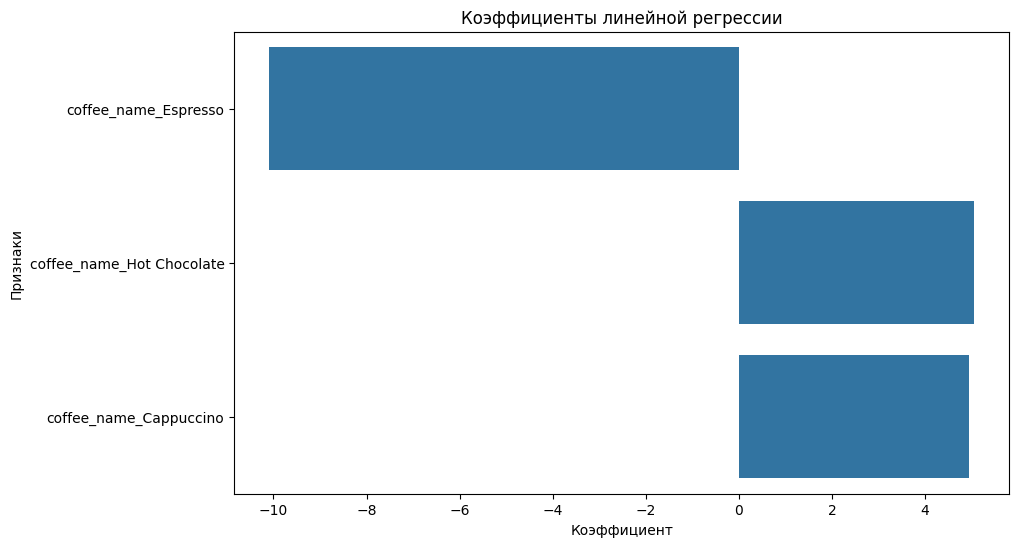

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=model3.coef_, y=best_features, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

In [ ]:
if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train, columns=X.columns)
    X_test_df = pd.DataFrame(X_test, columns=X.columns)
else:
    X_train_df = X_train
    X_test_df = X_test

X_top_train = X_train_df[best_features]
X_top_test = X_test_df[best_features]

model4 = LinearRegression()
model4.fit(X_top_train, y_train)

y_train_pred4 = model4.predict(X_top_train)
y_test_pred4 = model4.predict(X_top_test)

In [ ]:
print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred4)
#MAE насколько ошибаемся(ближе к 0)
#MAPE ошибка в процентах(ближе к 0)
#R² Показывает, насколько хорошо модель объясняет разброс данных(ближе к 1)
#MSE среднюя величина ошибки в квадрате(ближе к 0)
#RMSE Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют(ближе к 0)

метрики для выборки на которых обучалась модель
MAE 3.107
MAPE=0.104, MAPE_as_percent=10.401%
R2=0.364
MSE=15.260
RMSE=3.906


In [ ]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred4)
#MAE насколько ошибаемся(ближе к 0)
#MAPE ошибка в процентах(ближе к 0)
#R² Показывает, насколько хорошо модель объясняет разброс данных(ближе к 1)
#MSE среднюя величина ошибки в квадрате(ближе к 0)
#RMSE Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют(ближе к 0)

метрики для выборки на которых модель никогда не обучалась
MAE 3.192
MAPE=0.106, MAPE_as_percent=10.551%
R2=0.335
MSE=15.220
RMSE=3.901


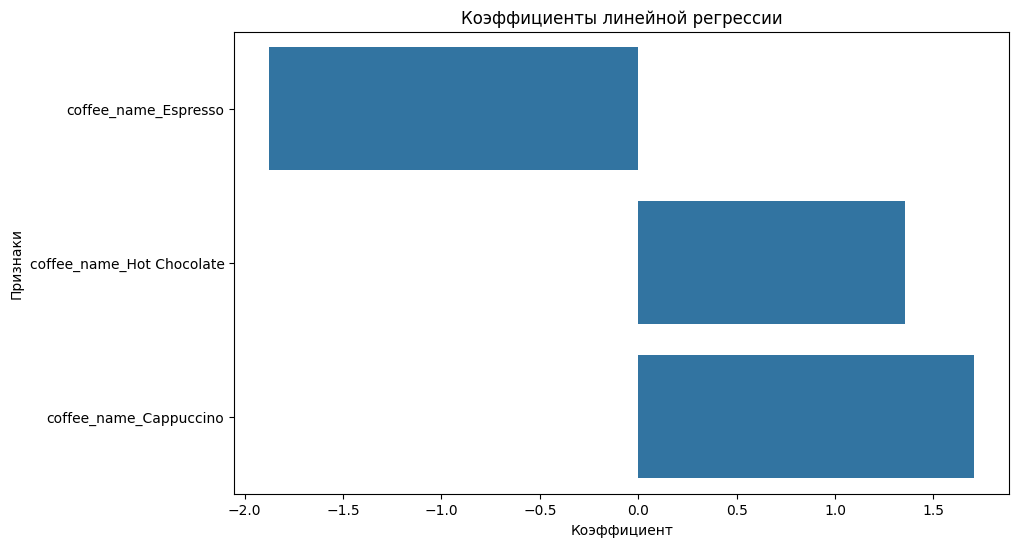

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=model4.coef_, y=best_features, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()